## importation des bibliotheque

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from print_color import print
import locale 
from datetime import datetime
locale.setlocale(locale.LC_TIME, 'fr_FR.UTF-8')


'fr_FR.UTF-8'

In [2]:
BRVM = pd.read_csv("../data/BRVM-Agriculture.csv",index_col="Date")

In [3]:
debut = -730
fin = len(BRVM)
brvm = BRVM.iloc[debut:]
brvm = BRVM.iloc[-730:]
brvm


,Dernier,Ouv.,Plus Haut,Plus Bas,Variation %,Close,High,Low,Open
Date,,,,,,,,,
16/06/2020,"64,92","64,92","64,92","64,92","0,00%",64.92,64.92,64.92,64.92
17/06/2020,"64,42","64,92","66,47","64,42","-0,77%",64.42,66.47,64.42,64.92
18/06/2020,"64,49","64,42","64,49","64,42","0,11%",64.49,64.49,64.42,64.42
19/06/2020,"63,55","64,49","65,06","63,55","-1,46%",63.55,65.06,63.55,64.49
22/06/2020,"64,45","63,55","64,45","63,55","1,42%",64.45,64.45,63.55,63.55
...,...,...,...,...,...,...,...,...,...
09/05/2023,"260,09","263,37","263,37","260,09","-1,25%",260.09,263.37,260.09,263.37
10/05/2023,"253,34","260,09","263,07","247,71","-2,60%",253.34,263.07,247.71,260.09
11/05/2023,"251,77","253,34","254,20","243,82","-0,62%",251.77,254.20,243.82,253.34


In [4]:
brvm['Close'].describe()

count    730.000000
mean     206.820685
std       95.120371
min       55.400000
25%      109.595000
50%      241.600000
75%      287.000000
max      349.650000
Name: Close, dtype: float64

### Calcul des moyennes mobiles longues et courtes

In [5]:
# creation de de colonne de moyenne mobile

# moyenne mobile rapide / court terme
r = 20#22
l = 30#37
brvm["MA10"] = brvm["Close"].rolling(r).mean() #10

# moyenne mobile lente / long terme
brvm["MA50"] = brvm["Close"].rolling(l).mean() #40

brvm = brvm.dropna() ;

C:\Users\steph\AppData\Local\Temp\ipykernel_3384\4204101166.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brvm["MA10"] = brvm["Close"].rolling(r).mean() #10
C:\Users\steph\AppData\Local\Temp\ipykernel_3384\4204101166.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brvm["MA50"] = brvm["Close"].rolling(l).mean() #40


In [6]:
# creation de la liste position
condition = [brvm["MA10"]>brvm["MA50"] , brvm["MA10"]<brvm["MA50"]]
# creation d'une liste choix de deux element
choix = [1,0]
# 
brvm['P'] = np.select(condition, choix)

C:\Users\steph\AppData\Local\Temp\ipykernel_3384\1963245404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brvm['P'] = np.select(condition, choix)


### Vérification des conditions d'achat et de vente du marché

A l'entré sur le marché nous ne pocédons pas de stock.
Au premier signal d'achat nous achetons des actifs.
Si il y a d'autre signal d'achat nous n'achetons pas car nous avons déja des actifs. 
De meme nous ne vendons pas si nous n'avons pas de stock en cas de signal de vente

In [7]:
condition = []
signal_achat = []
signal_vente = []
date_1 = brvm.index[0]
stock = 0 # permet d'eviter d'acheter quand on pas de stock au debut

for date in brvm.index :
    if brvm["MA10"].loc[date] > brvm["MA50"].loc[date] :
        condition.append(1)
    else :
        condition.append(0)
    
    if( brvm["MA10"].loc[date] > brvm["MA50"].loc[date] ) and (brvm["MA10"].loc[date_1] < brvm["MA50"].loc[date_1]) and stock == 0:
        signal_achat.append(brvm["Close"].loc[date])
        stock = 1

    else :
        signal_achat.append(np.nan)

    
    if( brvm["MA10"].loc[date] < brvm["MA50"].loc[date] ) and (brvm["MA10"].loc[date_1] > brvm["MA50"].loc[date_1]) and (stock == 1):
        signal_vente.append(brvm["Close"].loc[date])
        stock = 0
    else :
        signal_vente.append(np.nan)
        
    date_1 = date

brvm["Position"] = condition
        


C:\Users\steph\AppData\Local\Temp\ipykernel_3384\2291912371.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brvm["Position"] = condition


In [8]:
"""for i in range(len(brvm)-1 , 0 , -1 ) :
    if signal_achat[i] > 0 :
        signal_achat[i] = np.nan
        break"""
        

'for i in range(len(brvm)-1 , 0 , -1 ) :\n    if signal_achat[i] > 0 :\n        signal_achat[i] = np.nan\n        break'

In [9]:
achat_vente = []
stock = 0
for i in range( len(brvm) ) :
    if signal_achat[i] > 0 and stock != 1:
        achat_vente.append('acheter')
        stock = 1
    elif signal_vente[i] > 0 and stock != 0 :
        achat_vente.append('vendre' )
        stock=0
    else :
        achat_vente.append(np.nan)

brvm['achat_vente'] = achat_vente

C:\Users\steph\AppData\Local\Temp\ipykernel_3384\333253715.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brvm['achat_vente'] = achat_vente


In [10]:
dataf = pd.DataFrame()
dataf['date'] = brvm.index
dataf['achat'] = signal_achat
dataf['vente'] = signal_vente

u=dataf['achat'][0]
d=dataf[(dataf['achat']>0)|(dataf['vente']>0)]['date']
dataf[(dataf['achat']>0)|(dataf['vente']>0)]

,date,achat,vente
23,31/08/2020,65.75,NaN
54,14/10/2020,NaN,66.61
61,23/10/2020,67.80,NaN
183,19/04/2021,NaN,119.35
193,03/05/2021,138.95,NaN
215,07/06/2021,NaN,142.47
217,09/06/2021,143.94,NaN
336,29/11/2021,NaN,247.95
368,12/01/2022,238.93,NaN
381,31/01/2022,NaN,242.15


C:\Users\steph\AppData\Local\Temp\ipykernel_3384\4009803250.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


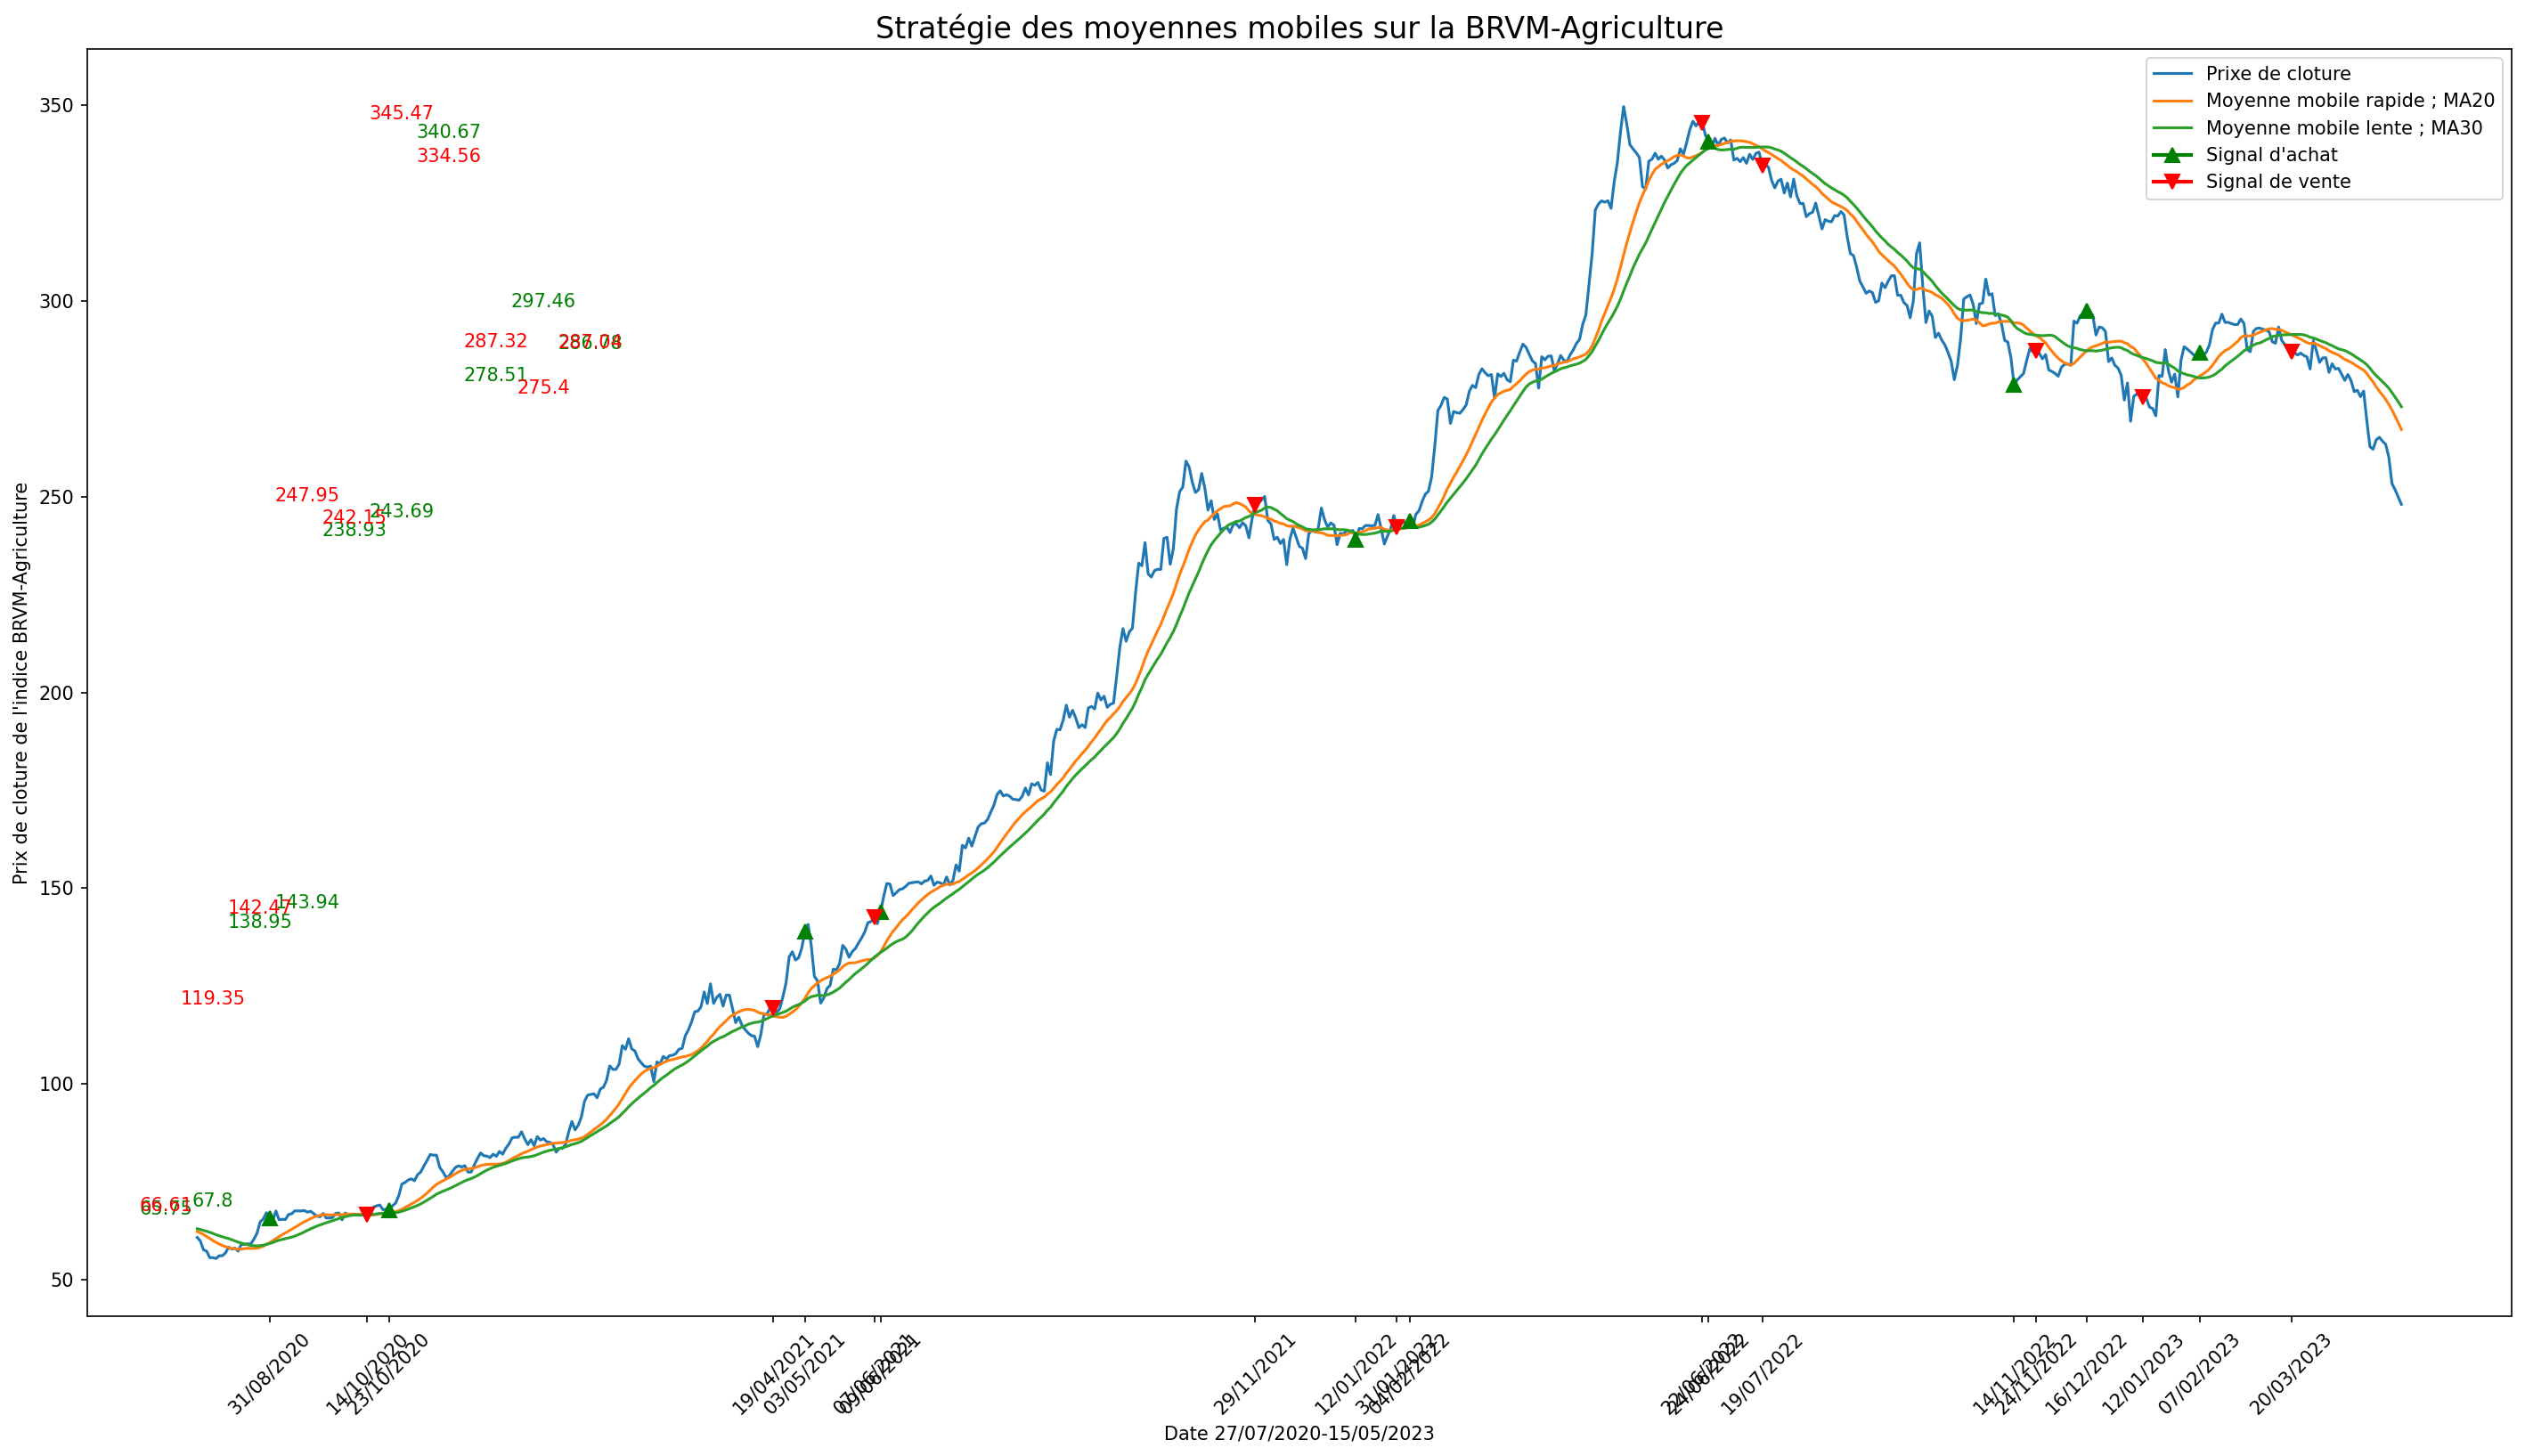

In [11]:
plt.figure(figsize=(19,11),dpi=150)
plt.plot(brvm.index , brvm["Close"] , label='Prixe de cloture' )
plt.plot(brvm.index , brvm["MA10"] , label=f'Moyenne mobile rapide ; MA{r}' )
plt.plot(brvm.index , brvm["MA50"] , label=f'Moyenne mobile lente ; MA{l}')

d=dataf[(dataf['achat']>0)|(dataf['vente']>0)]['date']
#position = [100,200,300,400,500,600]
#labels = [brvm.iloc[int(i)].name for i in position]
plt.xticks(d.index,d.values,rotation=45)
plt.tight_layout()

plt.plot(list(brvm.index ), signal_achat , marker='^',color='green',markersize=8,label = "Signal d'achat",linewidth=2)
plt.plot(brvm.index , signal_vente , marker='v',color='red',markersize=8,label = "Signal de vente",linewidth=2)
#for i in range( len(signal_achat) ) :
 #   if signal_achat[i] > 0 :
#        plt.text(d.values[i],signal_achat[i],str(signal_achat[i]) )

j=-10
for i, yi in enumerate(signal_achat):
    if yi >0:
        plt.text(j, yi, str(yi), color='green', ha='center', va='bottom')
        j+=15

j=-10
for i, yi in enumerate(signal_vente):
    if yi >0:
        plt.text(j, yi, str(yi), color='red', ha='center', va='bottom')
        j+=15


#axe1.plot(point[1][0],point[1][1] )
plt.legend()
plt.title("Stratégie des moyennes mobiles sur la BRVM-Agriculture" , fontsize=16) 
plt.ylabel("Prix de cloture de l'indice BRVM-Agriculture")
d = str(brvm.index[0]) ; 
f = str(brvm.index[len(brvm)-1])
plt.xlabel(f"Date {d}-{f}")
plt.savefig(r"C:\Users\steph\OneDrive\Documents\COURS\latex\img\MA-agri.jpg")
#plt.close()
plt.tight_layout()



## Backtesting

In [12]:
benefice = 0
depart = 1000
d = depart
nombre = 0
total = 0
l = []
for i in range( len( brvm ) ) :
    if brvm['achat_vente'].iloc[i] == 'acheter' :

        nombre = depart/brvm['Close'].iloc[i]
        entrer = nombre*brvm['Close'].iloc[i]

    elif brvm['achat_vente'].iloc[i] == 'vendre' :

        sorti = (nombre*brvm['Close'].iloc[i])
        benefice += sorti-entrer
        l.append(sorti-entrer)
        total += sorti
        depart = sorti
    else :
        pass

pourcentage_befice = 100*(benefice/d)

In [13]:
l

[13.07984790874525,
 770.2694123848939,
 45.17732562960509,
 1321.2800486444119,
 42.44915817732317,
 1333.2832475094751,
 -81.16665258448029,
 140.58712698062027,
 -340.02624518655375,
 3.848534242488313]

## Resulatats du backtesting

In [14]:
date_depart = datetime.strptime(BRVM.iloc[debut].name , "%d/%m/%Y" ).strftime("%A %d %B, %Y ")
date_fin = datetime.strptime(BRVM.iloc[fin-1].name , "%d/%m/%Y" ).strftime("%A %d %B, %Y ")

print("Avec un capitale de depart de " ,end="")
print("{:,.2f} Fcfa".format(d) , color='green')
print("nous avons réalisé un benefice de ",end='')
print("{:.2f} %".format(pourcentage_befice) , color='green')
print("Soit un benefice total de ",end='')
print("{:,.2f} Fcfa".format(benefice) , color='green')
print("Sur la periode allant du ",end='')
print(date_depart , color="blue" , end="") ; print(" au " ,end="")
print(date_fin , color="blue" , end="")


Avec un capitale de depart de 1,000.00 Fcfa
nous avons réalisé un benefice de 324.88 %
Soit un benefice total de 3,248.78 Fcfa
Sur la periode allant du mardi 16 juin, 2020  au lundi 15 mai, 2023 

In [15]:
df = pd.read_csv("../test/MA_BRVM-Agriculture_train.csv")
df["ratio"] = (df["positive"]/(df['negative']+df["positive"]))*100
df['rapide2'] = df['rapide']*2
df['lente10'] = df['rapide']+10

In [16]:
df[df['benef']==df['benef'].max()]

,Unnamed: 0,lente,rapide,benef,id,positive,negative,ratio,rapide2,lente10
29,29,59,20,13.439,308,1,0,100.0,40,30


In [17]:
df['dif'] = (df['lente']>=df['rapide2'])
len(df)

2911

In [18]:
print(df["benef"].max())
df0 = df[df['lente']>=df['lente10']]
df0

13.439


,Unnamed: 0,lente,rapide,benef,id,positive,negative,ratio,rapide2,lente10,dif
0,0,30,20,0.303,1,2,3,40.000000,40,30,False
1,1,31,20,0.312,336,1,3,25.000000,40,30,False
2,2,32,20,-0.406,335,2,2,50.000000,40,30,False
3,3,33,20,-1.467,334,1,2,33.333333,40,30,False
4,4,34,20,-1.467,333,1,2,33.333333,40,30,False
...,...,...,...,...,...,...,...,...,...,...,...
2906,2906,96,60,-32.162,271,0,1,0.000000,120,70,False
2907,2907,97,60,-32.162,270,0,1,0.000000,120,70,False
2908,2908,98,60,-32.162,269,0,1,0.000000,120,70,False
2909,2909,99,60,-33.015,268,0,1,0.000000,120,70,False


In [19]:
df1=df0[(df0['ratio']>=65)&(df['positive']>=3)]
print(len(df1))
D = df1[df1['benef']>=df1['benef'].max()-80].sort_values("benef")
D

0


C:\Users\steph\AppData\Local\Temp\ipykernel_3384\4000896436.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=df0[(df0['ratio']>=65)&(df['positive']>=3)]


,Unnamed: 0,lente,rapide,benef,id,positive,negative,ratio,rapide2,lente10,dif


In [20]:
dff = pd.read_csv("../test/MA_BRVM-Agriculture_train.csv")

In [21]:
df1=df0[(df0['ratio']>=70)]
periodes = [list(df1['lente']), list(df1['rapide']) ]
for l , r in zip( periodes[0],periodes[1] ):
    data=dff[(dff["lente"]>=l-1)&(dff["lente"]<=l+1)&(dff["rapide"]>=r-1)&(dff["rapide"]<=r+1)][["lente","rapide","benef","positive","negative"]]
    if (data['positive'].sum()/(data['positive'].sum()+data['negative'].sum()))*100 >=90:
        print((l , r) ,data['positive'].sum() , " ; " , data['negative'].sum() , " ;;; ", (data['positive'].sum()/(data['positive'].sum()+data['negative'].sum()))*100 )

(61, 20) 6  ;  0  ;;;  100.0
(62, 20) 6  ;  0  ;;;  100.0
(63, 20) 6  ;  0  ;;;  100.0
(64, 20) 6  ;  0  ;;;  100.0
(65, 20) 6  ;  0  ;;;  100.0
(66, 20) 6  ;  0  ;;;  100.0
(67, 20) 6  ;  0  ;;;  100.0
(68, 20) 6  ;  0  ;;;  100.0
(69, 20) 6  ;  0  ;;;  100.0
(70, 20) 6  ;  0  ;;;  100.0
(71, 20) 6  ;  0  ;;;  100.0
(61, 21) 9  ;  1  ;;;  90.0
(62, 21) 9  ;  0  ;;;  100.0
(63, 21) 9  ;  0  ;;;  100.0
(64, 21) 9  ;  0  ;;;  100.0
(65, 21) 9  ;  0  ;;;  100.0
(66, 21) 9  ;  0  ;;;  100.0
(67, 21) 9  ;  0  ;;;  100.0
(68, 21) 9  ;  0  ;;;  100.0
(69, 21) 9  ;  0  ;;;  100.0
(62, 22) 9  ;  0  ;;;  100.0
(63, 22) 9  ;  0  ;;;  100.0
(64, 22) 9  ;  0  ;;;  100.0
(65, 22) 9  ;  0  ;;;  100.0
(66, 22) 9  ;  0  ;;;  100.0
(67, 22) 9  ;  0  ;;;  100.0
(62, 23) 9  ;  1  ;;;  90.0
(63, 23) 9  ;  0  ;;;  100.0
(64, 23) 9  ;  0  ;;;  100.0
(65, 23) 9  ;  0  ;;;  100.0
(66, 23) 9  ;  0  ;;;  100.0
(63, 24) 9  ;  0  ;;;  100.0
(64, 24) 9  ;  0  ;;;  100.0
(65, 24) 9  ;  0  ;;;  100.0
(63, 25) 9  ;  1

In [22]:
l = 34; r =24
data=dff[(dff["lente"]>=l-1)&(dff["lente"]<=l+1)&(dff["rapide"]>=r-1)&(dff["rapide"]<=r+1)][["lente","rapide","benef","positive","negative"]]
text=''
for i in range(len(data)) :
    for d in data.iloc[i]:
        if str(d)[-2:] == ".0" :
            text+=f"\t&{int(d)}"
        else :
            text+=f"\t&{d}"
        i+=1
    text+="\t\\\ \n"
print(text)
data

	&33	&23	&-7.072	&1	&3	\\ 
	&34	&23	&-4.394	&2	&1	\\ 
	&35	&23	&-4.331	&2	&1	\\ 
	&33	&24	&-9.488	&1	&3	\\ 
	&34	&24	&-6.755	&1	&2	\\ 
	&35	&24	&-6.693	&1	&2	\\ 
	&33	&25	&-9.353	&2	&2	\\ 
	&34	&25	&-5.239	&2	&1	\\ 
	&35	&25	&-8.022	&1	&2	\\ 



,lente,rapide,benef,positive,negative
216,33,23,-7.072,1,3
217,34,23,-4.394,2,1
218,35,23,-4.331,2,1
287,33,24,-9.488,1,3
288,34,24,-6.755,1,2
289,35,24,-6.693,1,2
358,33,25,-9.353,2,2
359,34,25,-5.239,2,1
360,35,25,-8.022,1,2
